<Axes: xlabel='Date'>

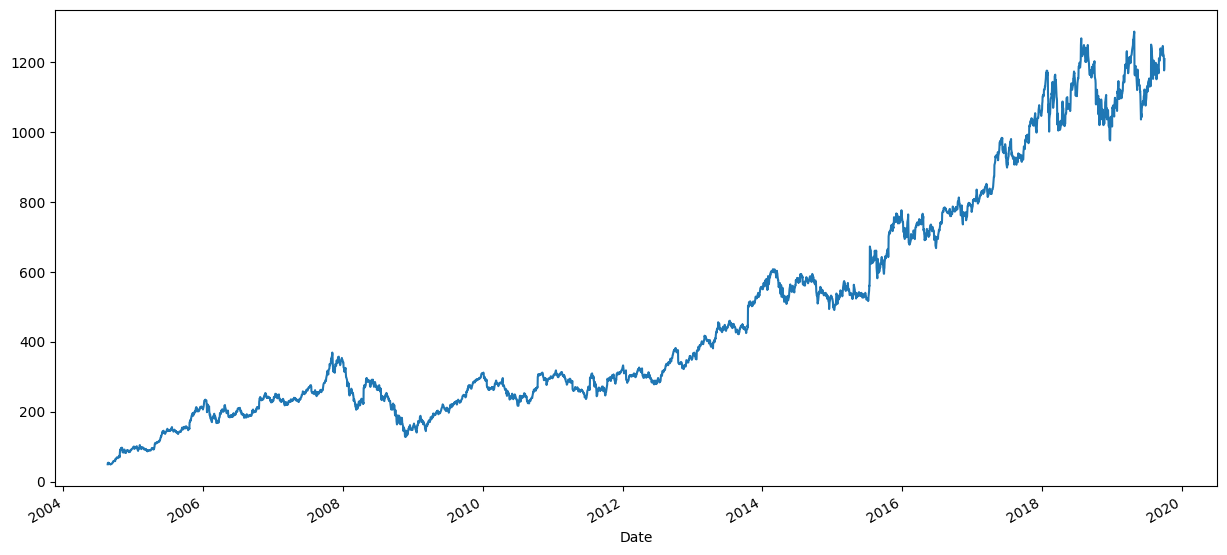

In [5]:
import yfinance as yf
from matplotlib import pyplot as plt
import pandas as pd

# ticker_symbol = 'GOOG'
# data = yf.download(ticker_symbol, start='2010-01-01', end='2024-01-01')

data = pd.read_csv('../data/GOOG.csv', index_col='Date', parse_dates=True)

# # train test split
# df = data[['Close']][:'2022']
# df_test = data[['Close']]['2022':]


df = data[['Close']]
df['Close'].plot(figsize=(15, 7))


In [6]:
from statsmodels.tsa.stattools import adfuller

adf_res = adfuller(df['Close'], autolag = 'AIC')
print('p-Values:' + str(adf_res[1]))

p-Values:0.985039740657828


C:\Users\napat\AppData\Local\Temp\ipykernel_17060\1849440833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close_diff'] = df['Close'].diff(1)


p-Values:2.676805533756612e-21


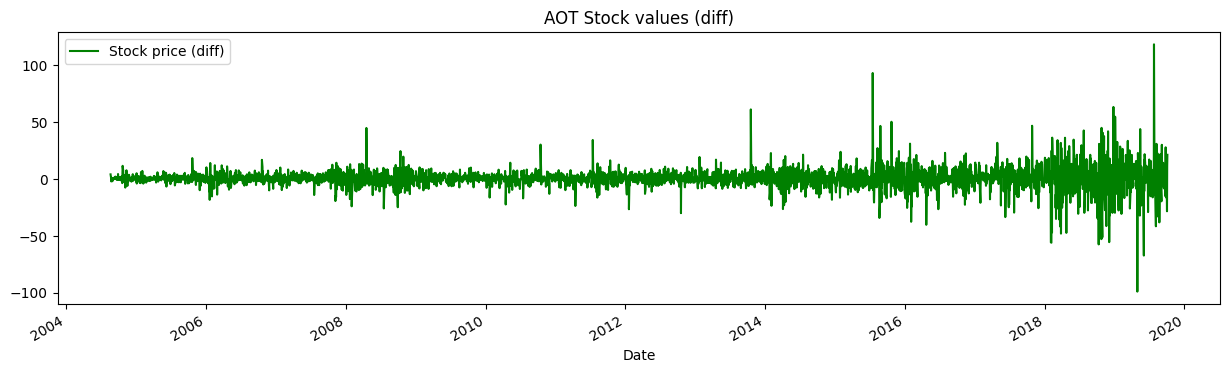

In [7]:
df['Close_diff'] = df['Close'].diff(1)
df['Close_diff'].plot(color = 'green', figsize = (15,4))
plt.legend(['Stock price (diff)'])
plt.title('AOT Stock values (diff)')

adf_res = adfuller(df['Close_diff'].dropna(), autolag = 'AIC')
print('p-Values:' + str(adf_res[1]))

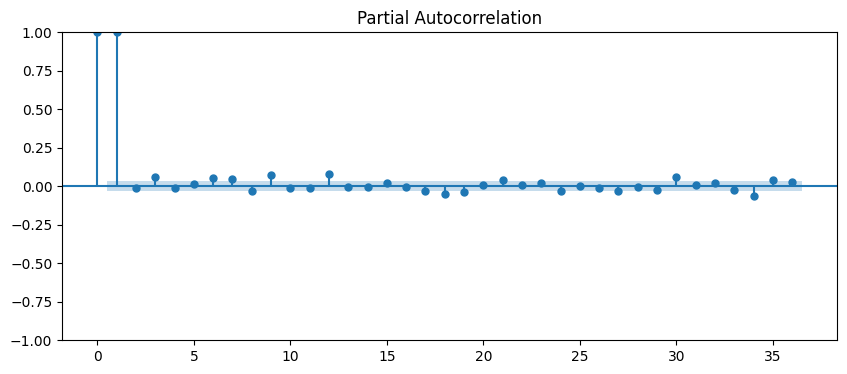

In [8]:
from statsmodels.graphics.tsaplots import  plot_pacf
from statsmodels.tsa.stattools import pacf

plt.rcParams.update({'figure.figsize':(10,4)})
plot_pacf(df['Close'].dropna(), method = 'ols')
df_pacf = pacf(df['Close'].dropna(), method = 'ols')

In [9]:
import numpy as np

for i in range(0, len(df_pacf)):
    if df_pacf[i] < 1.96 / np.sqrt(len(df['Close'])):
        print('p =',i - 1)
        break

p = 1


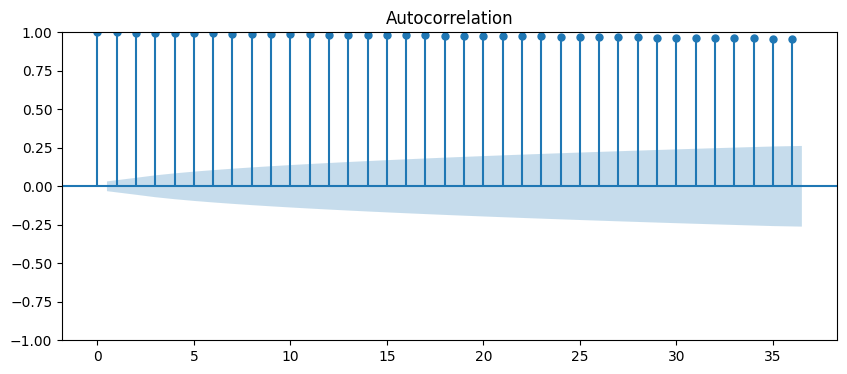

In [10]:

#Moving Average (q)
from statsmodels.graphics.tsaplots import  plot_acf
from statsmodels.tsa.stattools import acf

plt.rcParams.update({'figure.figsize':(10,4)})
plot_acf(df['Close'], fft = True)
df_acf = acf(df['Close'], fft = True)

In [11]:
for i in range(0, len(df_acf)):
    if df_acf[i] < 1.96 / np.sqrt(len(df['Close'])):
        print('q=', i - 1)
        break

In [12]:
import itertools
from statsmodels.tsa.arima.model import ARIMA
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

aic = []

for param in pdq:
    try:
        model = ARIMA(df['Close'].dropna(), order = param)
        results = model.fit()
        a = (results.aic, param)
        aic.append(a)
    except:
        continue
aic

c:\Users\napat\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\napat\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\napat\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\napat\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been pro

[(54891.09693688479, (0, 0, 0)),
 (49839.347078673025, (0, 0, 1)),
 (45337.786480022434, (0, 0, 2)),
 (27540.383928481853, (0, 1, 0)),
 (27541.900209319414, (0, 1, 1)),
 (27530.62020930551, (0, 1, 2)),
 (30129.545413924, (0, 2, 0)),
 (27540.0782915089, (0, 2, 1)),
 (27541.675993450637, (0, 2, 2)),
 (27559.59889265803, (1, 0, 0)),
 (27561.104843601366, (1, 0, 1)),
 (27549.87534304453, (1, 0, 2)),
 (27541.95654411497, (1, 1, 0)),
 (27535.508520933166, (1, 1, 1)),
 (27532.549071569905, (1, 1, 2)),
 (29202.540582606765, (1, 2, 0)),
 (27541.67718992029, (1, 2, 1)),
 (27535.278110231848, (1, 2, 2)),
 (27561.162252864808, (2, 0, 0)),
 (27554.708887888773, (2, 0, 1)),
 (27551.870699963365, (2, 0, 2)),
 (27531.073367610752, (2, 1, 0)),
 (27532.637672621968, (2, 1, 1)),
 (27524.57930940548, (2, 1, 2)),
 (28667.11358547167, (2, 2, 0)),
 (27530.394289805256, (2, 2, 1)),
 (27532.0237252475, (2, 2, 2))]

In [13]:
min_order = min(aic)[1]
print('Min AIC:', min(aic))

# aic is (value, (p, d, q))
# p is AR, q is MA, r is difference

# AR is the number of lags of Y to be used as predictors.
# what is number of lags meaning? how many previous values of Y are used to predict the current value of Y
# which mean next stock price is depend on previous stock price 
# what if p is 0? it means that the current value of Y is not dependent on the previous values of Y

# q is the number of lagged forecast errors that should go into the ARIMA model
# what is the meaning of q? how many previous forecast errors are used to predict the current value of Y
# which mean the next stock price is depend on previous forecast errors
# what if q is 0? it means that the current value of Y is not dependent on the previous forecast errors

# d is the number of differencing required to make the time series stationary
# what is the meaning of d? how many times the raw observations are differenced to make the time series stationary
# what if d is 0? it means that the time series is already stationary

# what if q is 0 and p is 0? it means that the current value of Y is not dependent on the previous values of Y and previous forecast errors
# what current y depend on if q and p is 0? ans: random walk (equation: Y(t) = c + e(t))

# what is e(t)? ans: error term at time t
# how we know e(t)? ans: we can't know e(t) because it is random
# which mean e(t) is random variable
# what is c? ans: constant term

# arima 1 1 1 equation: Y(t) = c + Y(t-1) + e(t-1) + e(t)


Min AIC: (27524.57930940548, (2, 1, 2))


c:\Users\napat\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\napat\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\napat\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\napat\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary startin

                               SARIMAX Results                                
Dep. Variable:             Close_diff   No. Observations:                 3809
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -13768.838
Date:                Sun, 05 May 2024   AIC                          27547.677
Time:                        03:31:24   BIC                          27578.901
Sample:                             0   HQIC                         27558.772
                               - 3809                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1595      0.153     -1.043      0.297      -0.459       0.140
ar.L2         -0.0574      0.010     -5.584      0.000      -0.078      -0.037
ma.L1         -0.8296      0.154     -5.393      0.0

c:\Users\napat\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


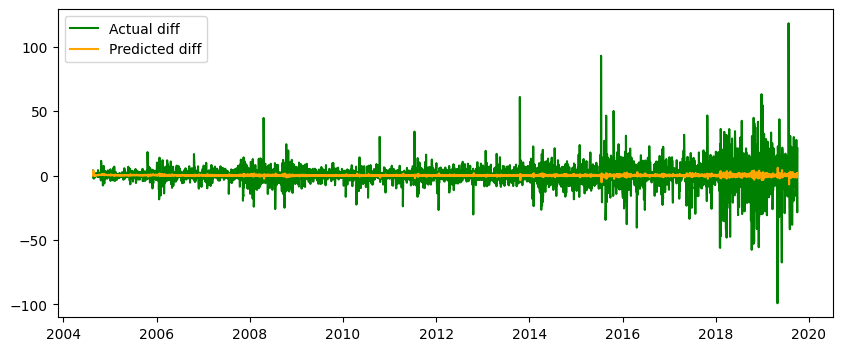

In [14]:
model = ARIMA(df['Close_diff'], order = min_order)
results = model.fit()
print(results.summary())

#Prediction
plt.figsize = (15,4)
plt.plot(df['Close_diff'], color = 'green', label = 'Actual diff')
plt.plot(results.predict(), color= 'orange', label = 'Predicted diff')
plt.legend()

In [15]:
# print mse
from sklearn.metrics import mean_squared_error
df['Close_diff'].fillna(0, inplace = True)
mse = mean_squared_error(df['Close_diff'], results.predict())
print('MSE:', mse)

MSE: 80.58465554121081


C:\Users\napat\AppData\Local\Temp\ipykernel_17060\1588731844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close_diff'].fillna(0, inplace = True)


80.58465554121081

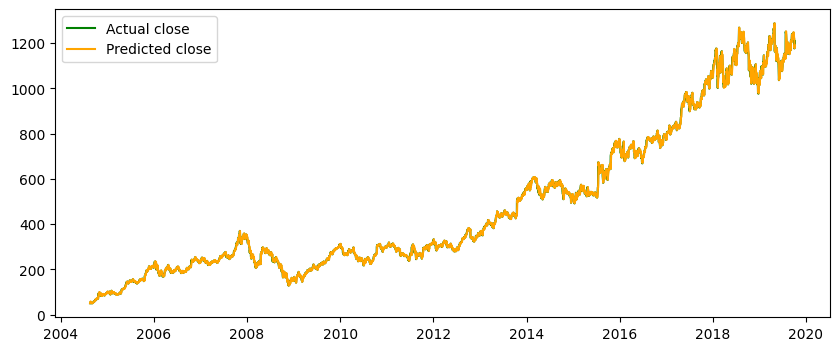

In [16]:
import pandas as pd

prediction = pd.DataFrame(columns=['Predicted'])
prediction['Predicted'] = results.predict()
df_pred = pd.merge(df, prediction, how = 'left', left_index = True, right_index = True)

df_pred['Predicted_close'] = df_pred['Close'] + df_pred['Predicted'].shift(-1)
df_pred['Predicted_close'] = df_pred['Predicted_close'].shift(1).fillna(df['Close'])
plt.plot(df_pred['Close'], color = 'green', label = 'Actual close')
plt.plot(df_pred['Predicted_close'], color='orange', label = 'Predicted close')
plt.legend()


from sklearn.metrics import mean_squared_error
mean_squared_error(df_pred['Close'], df_pred['Predicted_close'])